In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%run util.py
pwd = os.getcwd()

In [2]:
# mpich-devel-ofi-gcc-8.3.0 fails due to OFI error, 
# and hence isn't plotted.

key_dag = {1:'x5jirha',
           2:'m2lvcpo',
           3:'dh5i74e',
           4:'7q37r7h',
           5:'2momcvv',
           6:'7x34z32'}
           #7:'dr24ede'}

dag_soft = {'x5jirha':'openmpi-1.10.5-gcc-6.4.0',
            'm2lvcpo':'mpich-develop-ucx-gcc-8.3.0',
            'dh5i74e':'openmpi-4.0.2-verbs-gcc-8.3.0',
            '7q37r7h':'mpich-3.3.2-ucx-gcc-8.3.0',
            '2momcvv':'openmpi-4.0.2-ucx-gcc-8.3.0',
            '7x34z32':'mvapich-2.3.2-gcc-8.3.0'}
            #'dr24ede':'mpich-devel-ofi-gcc-8.3.0'

col_dict = {1:'r',2:'b',3:'g',4:'c',5:'m',6:'y',7:'k'}

osu_ver = 'v5.6.1'
trials  = 20

In [3]:
bw_mean     = np.zeros((23,len(dag_soft)))
bw_std      = np.zeros((23,len(dag_soft)))
lt_mean     = np.zeros((23,len(dag_soft)))
lt_std      = np.zeros((23,len(dag_soft)))

In [4]:
for i in np.arange(1,len(dag_soft)+1):
    loc = '/mnt/c/Users/sajid/Documents/misc/nu-quest-bench/mpi/new/'+key_dag[i]
    BW = get_BW_dset(loc,osu_ver,trials)
    bw_mean[:,i-1] = np.mean(BW,axis=1)
    bw_std[:,i-1]  = np.std(BW,axis=1)
    
    LT = get_LT_dset(loc,osu_ver,trials)
    lt_mean[:,i-1] = np.mean(LT,axis=1)
    lt_std[:,i-1]  = np.std(LT,axis=1)

os.chdir(pwd)

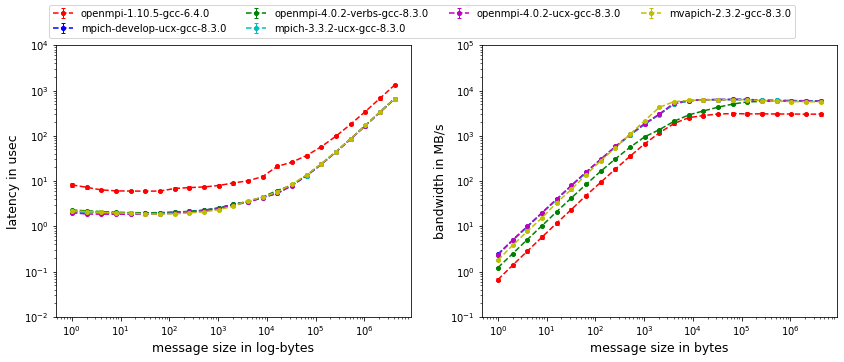

In [5]:
plt.rcParams["figure.figsize"] = (14,5)
f,(ax1,ax2) = plt.subplots(1,2)

for i in range(1,len(dag_soft)+1):
    _x = bw_key
    ax1.errorbar(_x, lt_mean[:,i-1],lt_std[:,i-1],
                 c=col_dict[i], 
                 fmt='--o',markersize=4,elinewidth=1,capsize=2)
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax1.set_ylim((10**-2,10**4))
    ax1.set_xlabel('message size in log-bytes',size=12.5);
    ax1.set_ylabel('latency in usec',size=12.5);

    _x = lt_key
    ax2.errorbar(_x, bw_mean[:,i-1],bw_std[:,i-1],
                 c=col_dict[i], label=dag_soft[key_dag[i]],
                 fmt='--o',markersize=4,elinewidth=1,capsize=2)
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    ax2.set_ylim((10**-1,10**5))
    ax2.set_xlabel('message size in bytes',size=12.5);
    ax2.set_ylabel('bandwidth in MB/s',size=12.5);

    
handles, labels = ax2.get_legend_handles_labels()  
f.legend(loc='upper center', fontsize='medium',ncol=4)
plt.savefig("new_mpi.png",dpi=100)

openmpi-1.10.5-gcc-6.4.0
openmpi-4.0.2-verbs-gcc-8.3.0
0.6374567118315332


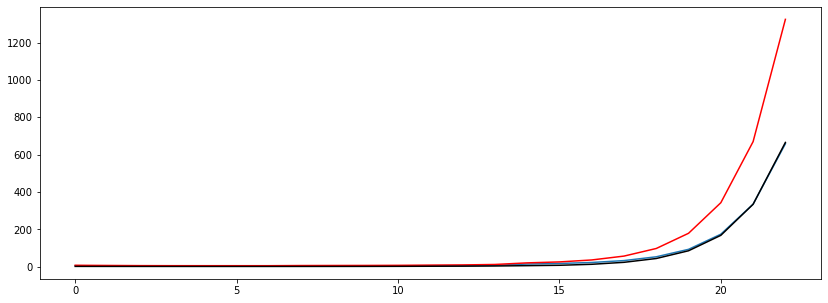

In [6]:
i = 1
j = 3
print(dag_soft[key_dag[i]])
print(dag_soft[key_dag[j]])
diff = lt_mean[:,i-1]/lt_mean[:,j-1]
plt.plot(((lt_mean[:,i-1]-lt_mean[:,j-1])))
plt.plot(((lt_mean[:,i-1])),'r')
plt.plot(((lt_mean[:,j-1])),'k')
print(np.mean((lt_mean[:,i-1]-lt_mean[:,j-1])/lt_mean[:,i-1]))

openmpi-1.10.5-gcc-6.4.0
openmpi-4.0.2-verbs-gcc-8.3.0
0.6625978234549424


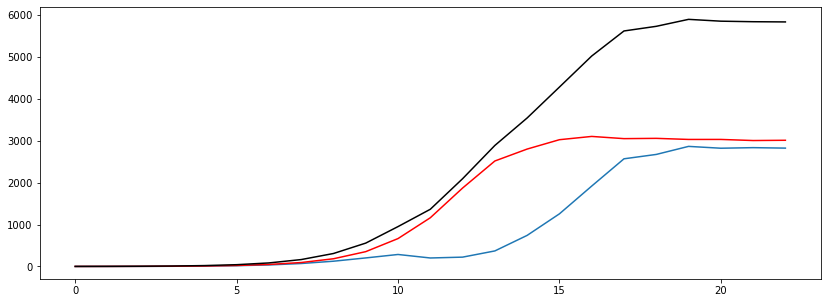

In [7]:
i = 1
j = 3
print(dag_soft[key_dag[i]])
print(dag_soft[key_dag[j]])
diff = bw_mean[:,i-1]/bw_mean[:,j-1]
plt.plot(((bw_mean[:,j-1]-bw_mean[:,i-1])))
plt.plot(((bw_mean[:,i-1])),'r')
plt.plot(((bw_mean[:,j-1])),'k')
print(np.mean((bw_mean[:,j-1]-bw_mean[:,i-1])/bw_mean[:,i-1]))

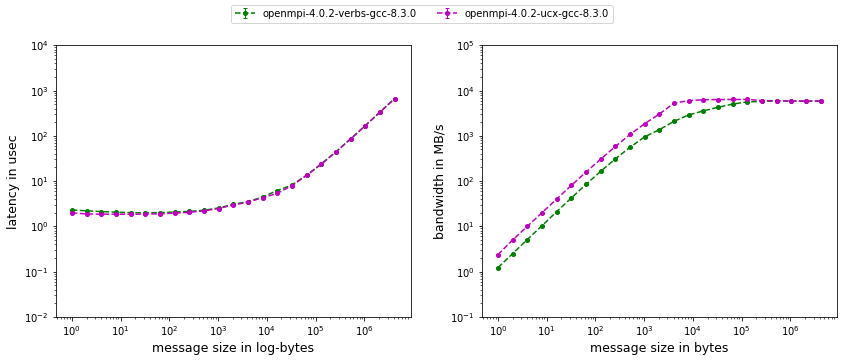

In [8]:
plt.rcParams["figure.figsize"] = (14,5)
f,(ax1,ax2) = plt.subplots(1,2)

for i in [3,5]:
    _x = bw_key
    ax1.errorbar(_x, lt_mean[:,i-1],lt_std[:,i-1],
                 c=col_dict[i], 
                 fmt='--o',markersize=4,elinewidth=1,capsize=2)
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax1.set_ylim((10**-2,10**4))
    ax1.set_xlabel('message size in log-bytes',size=12.5);
    ax1.set_ylabel('latency in usec',size=12.5);

    _x = lt_key
    ax2.errorbar(_x, bw_mean[:,i-1],bw_std[:,i-1],
                 c=col_dict[i], label=dag_soft[key_dag[i]],
                 fmt='--o',markersize=4,elinewidth=1,capsize=2)
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    ax2.set_ylim((10**-1,10**5))
    ax2.set_xlabel('message size in bytes',size=12.5);
    ax2.set_ylabel('bandwidth in MB/s',size=12.5);

    
handles, labels = ax2.get_legend_handles_labels()  
f.legend(loc='upper center', fontsize='medium',ncol=2)
plt.savefig("oepnmp_ucx_vs_verbs.png",dpi=100)

openmpi-4.0.2-verbs-gcc-8.3.0
openmpi-4.0.2-ucx-gcc-8.3.0
0.05184190212328355


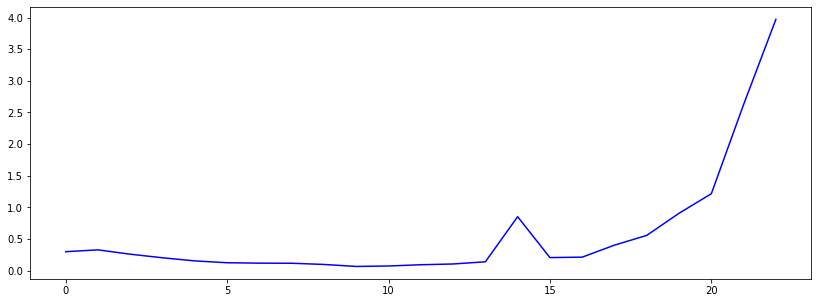

In [9]:
i = 3
j = 5
print(dag_soft[key_dag[i]])
print(dag_soft[key_dag[j]])
diff = lt_mean[:,i-1]/lt_mean[:,j-1]
plt.plot(((lt_mean[:,i-1]-lt_mean[:,j-1])),'b')
#plt.plot(((lt_mean[:,i-1])),'r')
#plt.plot(((lt_mean[:,j-1])),'k')
print(np.mean((lt_mean[:,i-1]-lt_mean[:,j-1])/lt_mean[:,i-1]))

openmpi-4.0.2-verbs-gcc-8.3.0
openmpi-4.0.2-ucx-gcc-8.3.0
0.6776646244892222


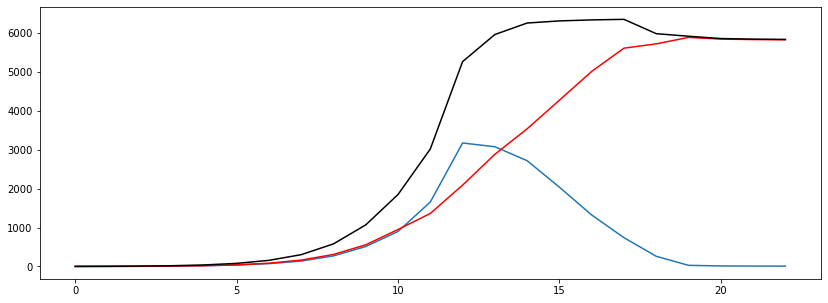

In [10]:
i = 3
j = 5
print(dag_soft[key_dag[i]])
print(dag_soft[key_dag[j]])
diff = bw_mean[:,i-1]/bw_mean[:,j-1]
plt.plot(((bw_mean[:,j-1]-bw_mean[:,i-1])))
plt.plot(((bw_mean[:,i-1])),'r')
plt.plot(((bw_mean[:,j-1])),'k')
print(np.mean((bw_mean[:,j-1]-bw_mean[:,i-1])/bw_mean[:,i-1]))

In [11]:
!mv *.png plots/

In [12]:
bw_min = np.zeros(23)
bw_max = np.zeros(23)
lt_min = np.zeros(23)
lt_max = np.zeros(23)

In [13]:
for i in range(23):
    _min = []
    _max = []
    for j in range(1,len(key_dag)+1):
        _min.append(np.min(bw_mean[i,j-1]))
        _max.append(np.max(bw_mean[i,j-1]))
    bw_min[i] = min(_min)
    bw_max[i] = max(_max)
    
for i in range(23):
    _min = []
    _max = []
    for j in range(1,len(key_dag)+1):
        _min.append(np.min(lt_mean[i,j-1]))
        _max.append(np.max(lt_mean[i,j-1]))
    lt_min[i] = min(_min)
    lt_max[i] = max(_max)

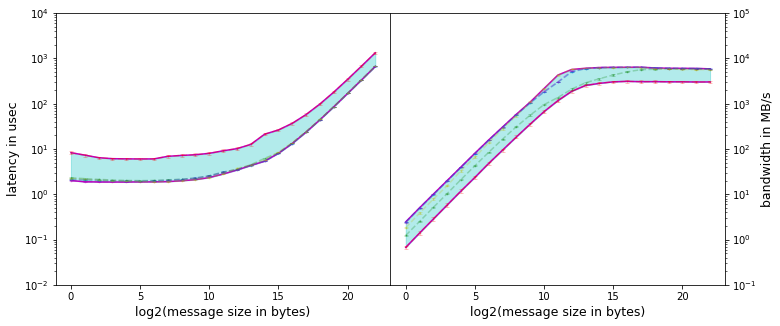

In [14]:
import matplotlib.ticker as plticker
plt.rcParams["figure.figsize"] = (12,5)
f,(ax1,ax2) = plt.subplots(1,2)

ax1.plot(np.log2(_x),lt_min,'m')
ax1.plot(np.log2(_x),lt_max,'m')
ax1.fill_between(np.log2(_x), lt_min, lt_max, alpha=0.3, color = 'c')
#ax1.set_xscale('log')
ax1.set_ylim((10**-2,10**5))

ax2.plot(np.log2(_x),bw_min,'m')
ax2.plot(np.log2(_x),bw_max,'m')
ax2.fill_between(np.log2(_x), bw_min, bw_max, alpha=0.3, color = 'c')
ax2.set_yscale('log')
#ax2.set_xscale('log')
ax2.set_ylim((10**-1,10**5))

#ax1.xaxis.set_major_locator(loc)
#loc = plticker.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals
#ax2.xaxis.set_major_locator(loc)
#loc = plticker.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals



for i in range(1,len(key_dag)+1):
    _x = bw_key
    ax1.errorbar(np.log2(_x), lt_mean[:,i-1],lt_std[:,i-1],
                 c=col_dict[i], 
                 fmt='--o',markersize=1,elinewidth=0.5,capsize=2, alpha=0.25)
    ax1.set_yscale('log')
    #ax1.set_xscale('log')
    ax1.set_ylim((10**-2,10**4))
    ax1.set_xlabel('log2(message size in bytes)',size=12.5);
    ax1.set_ylabel('latency in usec',size=12.5);

    _x = lt_key
    ax2.errorbar(np.log2(_x), bw_mean[:,i-1],bw_std[:,i-1],
                 c=col_dict[i], label=dag_soft[key_dag[i]],
                 fmt='--o',markersize=1,elinewidth=0.5,capsize=2, alpha=0.25)
    
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()
    ax2.set_yscale('log')
    #ax2.set_xscale('log')
    ax2.set_ylim((10**-1,10**5))
    ax2.set_xlabel('log2(message size in bytes)',size=12.5);
    ax2.set_ylabel('bandwidth in MB/s',size=12.5);
    
plt.subplots_adjust(hspace = 0.2, wspace = 0)
#f.savefig("curr_mpi_combined.png",dpi=100)

In [15]:
marker_dict={1:'o',
             2:'x',
             3:'d',
             4:'s',
             5:'v',
             6:'^' }

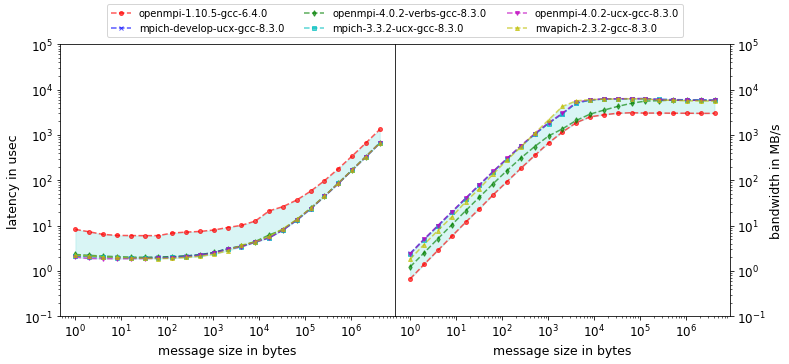

In [16]:
import matplotlib.ticker as plticker
plt.rcParams["figure.figsize"] = (12,5)
f,(ax1,ax2) = plt.subplots(1,2)

#ax1.xaxis.set_major_locator(loc)
#loc = plticker.LogLocator(base=4.0) # this locator puts ticks at regular intervals
#ax2.xaxis.set_major_locator(loc)
#loc = plticker.LogLocator(base=4.0) # this locator puts ticks at regular intervals

for i in range(1,len(key_dag)+1):
    _x = bw_key
    #ax1.errorbar(_x, lt_mean[:,i-1],lt_std[:,i-1],
    #             c=col_dict[i], 
    #             fmt=marker_dict[i],markersize=4,elinewidth=0,capsize=0, alpha=0.65)
    ax1.plot(_x, lt_mean[:,i-1],
                 c=col_dict[i],
                 markersize=4,linestyle='dashed',
                 marker=marker_dict[i],alpha=0.65)
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax1.set_ylim((10**-2,10**4))
    ax1.set_xlabel('message size in bytes',size=12.5);
    ax1.set_ylabel('latency in usec',size=12.5);

    _x = lt_key
    #ax2.errorbar(_x, bw_mean[:,i-1],bw_std[:,i-1],
    #             c=col_dict[i], label=dag_soft[key_dag[i]],
    #             fmt=marker_dict[i],markersize=4,elinewidth=0,capsize=0, alpha=0.65)
    ax2.plot(_x, bw_mean[:,i-1],
                 c=col_dict[i],markersize=4, linestyle='dashed',
                 label=dag_soft[key_dag[i]],alpha=0.65,
                 marker=marker_dict[i])
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    ax2.set_ylim((10**-1,10**5))
    ax2.set_xlabel('message size in bytes',size=12.5);
    ax2.set_ylabel('bandwidth in MB/s',size=12.5);
    
#ax1.plot(_x,lt_min,'m')
#ax1.plot(_x,lt_max,'m')
ax1.fill_between(_x, lt_min, lt_max, alpha=0.15, color = 'c')
ax1.set_xscale('log')
ax1.set_ylim((10**-1,10**5))

#ax2.plot(_x,bw_min,'m')
#ax2.plot(_x,bw_max,'m')
ax2.fill_between(_x, bw_min, bw_max, alpha=0.15, color = 'c')
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim((10**-1,10**5))


ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)

f.legend(loc='upper center', fontsize='medium',ncol=3)
plt.subplots_adjust(hspace = 0.2, wspace = 0)
plt.savefig("new_pearc.svg",format='svg',dpi=250)

In [17]:
!mv *.png plots/

mv: cannot stat '*.png': No such file or directory
